In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import graphviz

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')

## [체질검사]
#### 체질 비만도를 예측하기 위한 서포트 벡터 머신분석을 실시하고 결과를 해석하시오.
### 1. 데이터 구성하기

In [17]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [66]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


### 2. 모델 생성

In [67]:
#기본 분석 모델 생성:SVR
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.181
Score on test set:-0.036


설명력이 매우 낮음 : 데이터 scale 변환이 필요!

In [68]:
#현재  생성된 모델의 옵션 확인
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
#scale 변환
v_feature_name = df_train_x.columns

#sclae 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712


In [70]:
#Scale 변환 데이터 분할
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=1234)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (176, 13)
test data X size : (76, 13)


In [71]:
#기본 모델 분석 :Scale 변환 데이터
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Score on training set:0.578
Score on test set:0.499


In [72]:
#parameter 조정 : C규제 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_C=[10 ** c for c in range(-2,3)]

for v_C in para_C:
    svm = SVR(C = v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_C = pd.DataFrame()
df_score_C['C']=para_C
df_score_C['TrainScore']=train_score
df_score_C['TestScore']=test_score

In [73]:
# 모델 설명력 확인
df_score_C.round(3)

,C,TrainScore,TestScore
0,0.01,0.018,-0.025
1,0.10,0.151,0.110
2,1.00,0.578,0.499
3,10.00,0.846,0.538
4,100.00,0.953,0.446


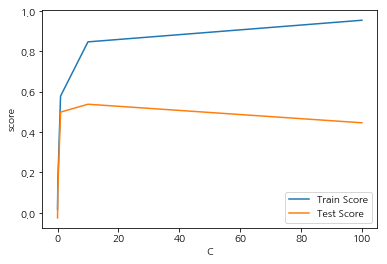

In [74]:
#모델 설명력 그래프 확인
plt.plot(para_C, train_score, linestyle='-', label='Train Score')
plt.plot(para_C, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('C')
plt.legend()

In [75]:
#parameter 조정: Gamma 규제 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_gamma=[10 ** gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C=10)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_gamma = pd.DataFrame()
df_score_gamma['C']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score

In [76]:
# 모델 설명력 확인
df_score_gamma.round(3)

,C,TrainScore,TestScore
0,0.01,0.764,0.594
1,0.10,0.868,0.537
2,1.00,0.927,0.164
3,10.00,0.912,-0.046
4,100.00,0.912,-0.046


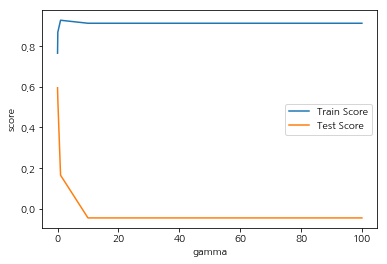

In [77]:
#모델 설명력 그래프 확인
plt.plot(para_gamma, train_score, linestyle='-', label='Train Score')
plt.plot(para_gamma, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('gamma')
plt.legend()

In [78]:
#parameter 조정: epsilon 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_epsilon=[eps/20 for eps in range(1,21)]

for v_epsilon in para_epsilon:
    svm = SVR(epsilon = v_epsilon, C=10, gamma=0.01)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_epsilon = pd.DataFrame()
df_score_epsilon['epsilon']=para_epsilon
df_score_epsilon['TrainScore']=train_score
df_score_epsilon['TestScore']=test_score

In [81]:
# 모델 설명력 확인
df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.764,0.595
1,0.10,0.764,0.594
2,0.15,0.764,0.593
3,0.20,0.764,0.592
4,0.25,0.763,0.591
5,0.30,0.762,0.590
6,0.35,0.762,0.589
7,0.40,0.762,0.588
8,0.45,0.761,0.587
9,0.50,0.762,0.585


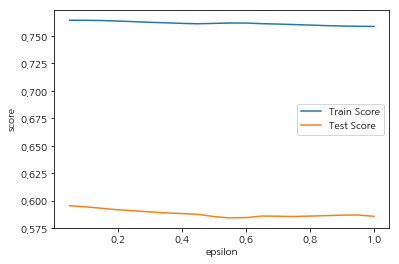

In [82]:
#모델 설명력 그래프 확인
plt.plot(para_epsilon, train_score, linestyle='-', label='Train Score')
plt.plot(para_epsilon, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('epsilon')
plt.legend()

### 3. 결론 도출

In [83]:
svr_final = SVR(C=10, gamma=0.01, epsilon=0.5)
svr_final.fit(df_scaled_train_x, df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svr_final.score(df_scaled_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svr_final.score(df_scaled_test_x,df_test_y)))

Score on training set:0.762
Score on test set:0.585


## [실습] 당뇨병 발생 원인
#### 당뇨벼 발생을 예측하기 위해 서포트 벡터 머신 분석을 실시하고 결과를 해석하시오.
### 1. 데이터 구성하기

In [104]:
df_raw = pd.read_csv('/home/pirl/Downloads/data2_py/DIABETES.csv')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [120]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop(['Y','GENDER'], axis=1, inplace=False)
#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3, random_state=34)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 9)
train data Y size : (309,)
test data X size : (133, 9)
test data Y size : (133,)


In [121]:
#기본 분석 모델 생성:SVR
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

Score on training set:-0.004
Score on test set:-0.007


In [122]:
#scale 변환
v_feature_name = df_train_x.columns

#sclae 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [123]:
#Scale 변환 데이터 분할 : train/test 나누기 전에 scale 해주기!!!

df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=34)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (309, 9)
test data X size : (133, 9)


In [124]:
#기본 모델 분석 :Scale 변환 데이터
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x,df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Score on training set:0.208
Score on test set:0.182


In [125]:
#parameter 조정 : C규제 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_C=[10 ** c for c in range(-2,3)]

for v_C in para_C:
    svm = SVR(C = v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_C = pd.DataFrame()
df_score_C['C']=para_C
df_score_C['TrainScore']=train_score
df_score_C['TestScore']=test_score

In [126]:
# 모델 설명력 확인
df_score_C.round(3)

,C,TrainScore,TestScore
0,0.01,-0.023,-0.004
1,0.10,0.007,0.019
2,1.00,0.208,0.182
3,10.00,0.541,0.390
4,100.00,0.673,0.315


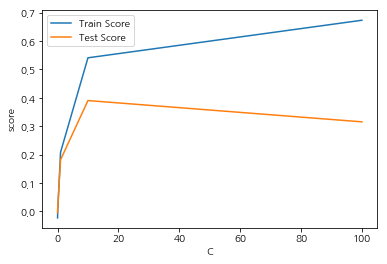

In [127]:
#모델 설명력 그래프 확인
plt.plot(para_C, train_score, linestyle='-', label='Train Score')
plt.plot(para_C, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('C')
plt.legend()

In [128]:
#parameter 조정: Gamma 규제 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_gamma=[10 ** gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C=10)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_gamma = pd.DataFrame()
df_score_gamma['C']=para_gamma
df_score_gamma['TrainScore']=train_score
df_score_gamma['TestScore']=test_score

In [129]:
# 모델 설명력 확인
df_score_gamma.round(3)

,C,TrainScore,TestScore
0,0.01,0.474,0.365
1,0.10,0.540,0.394
2,1.00,0.243,0.065
3,10.00,0.184,-0.011
4,100.00,0.184,-0.011


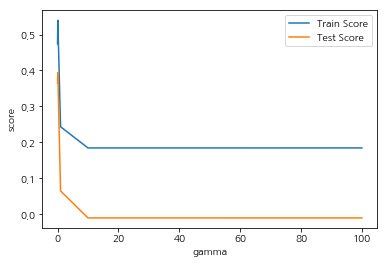

In [130]:
#모델 설명력 그래프 확인
plt.plot(para_gamma, train_score, linestyle='-', label='Train Score')
plt.plot(para_gamma, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('gamma')
plt.legend()

In [131]:
#parameter 조정: epsilon 변경

#train , test 설명력 결과 저장
train_score=[]; test_score=[]
para_epsilon=[eps/20 for eps in range(1,21)]

for v_epsilon in para_epsilon:
    svm = SVR(epsilon = v_epsilon, C=10, gamma=0.1)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x,df_train_y))
    test_score.append(svm.score(df_scaled_test_x,df_test_y))

#결과 저장
df_score_epsilon = pd.DataFrame()
df_score_epsilon['epsilon']=para_epsilon
df_score_epsilon['TrainScore']=train_score
df_score_epsilon['TestScore']=test_score

In [132]:
# 모델 설명력 확인
df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.54,0.394
1,0.10,0.54,0.394
2,0.15,0.54,0.394
3,0.20,0.54,0.394
4,0.25,0.54,0.394
5,0.30,0.54,0.394
6,0.35,0.54,0.394
7,0.40,0.54,0.394
8,0.45,0.54,0.394
9,0.50,0.54,0.394


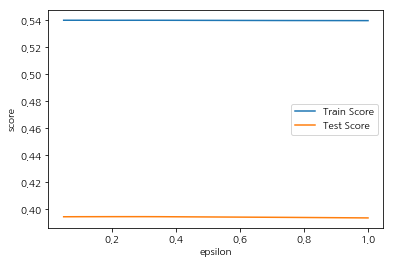

In [133]:
#모델 설명력 그래프 확인
plt.plot(para_epsilon, train_score, linestyle='-', label='Train Score')
plt.plot(para_epsilon, test_score, linestyle='-', label='Test Score')
plt.ylabel('score');plt.xlabel('epsilon')
plt.legend()

In [134]:
svr_final = SVR(C=10, gamma=0.1, epsilon=0.5)
svr_final.fit(df_scaled_train_x, df_train_y)

#train 데이터의 설명력
print('Score on training set:{:.3f}'.format(svr_final.score(df_scaled_train_x,df_train_y)))

#test 데이터의 설명력
print('Score on test set:{:.3f}'.format(svr_final.score(df_scaled_test_x,df_test_y)))

Score on training set:0.540
Score on test set:0.394


In [135]:
##GridSearchCV를 이용한 최적 parameter 찾기
estimator=SVR()

param_grid = {'C':para_C,'gamma':para_gamma,'epsilon':para_epsilon}

grid_dt = GridSearchCV(estimator, param_grid,scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=1.0, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

best parameter:
{'C': 100, 'epsilon': 1.0, 'gamma': 0.01}

best score:
0.047
